<a href="https://colab.research.google.com/github/shivansh9770/Netflix-Movies-and-TV-show-Clustering/blob/main/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

### **Mounting Drive**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### **Importing csv file**

In [3]:
netflix_df = pd.read_csv('/content/drive/MyDrive/Netflix Movies and TV Shows Clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### **Exploring Data**

In [4]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


We will remove show_id,date added, duration and title probably

In [6]:
#evaluate no of rows and columns
print('NO of rows = '+ str(netflix_df.shape[0]))
print('NO of columns = '+ str(netflix_df.shape[1]))

NO of rows = 7787
NO of columns = 12


In [7]:
#To show No. of total values(elements) in the dataset
netflix_df.size

93444

In [8]:
#TO show the column name
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [9]:
#TO show the data type of each columns
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [10]:
#To show the datasets information like indexs,columns,data type etc.
netflix_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [11]:
#checking nan values
netflix_df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [12]:
#check the missing values percentage
missing_values_percentage = netflix_df.isna().mean()*100
print(missing_values_percentage)

show_id          0.000000
type             0.000000
title            0.000000
director        30.679337
cast             9.220496
country          6.510851
date_added       0.128419
release_year     0.000000
rating           0.089893
duration         0.000000
listed_in        0.000000
description      0.000000
dtype: float64


##This library is for showing the graph of missing value

In [13]:
#library
import missingno as msno

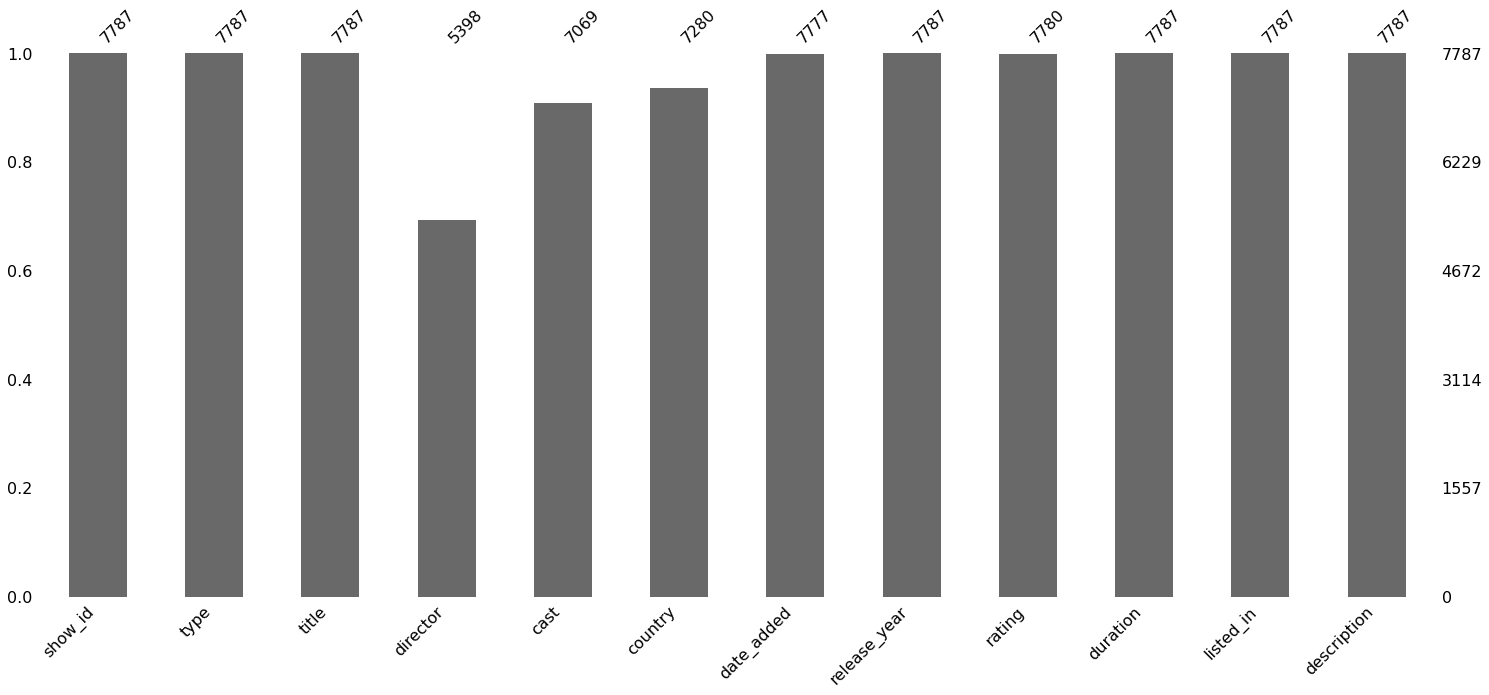

In [14]:
#this graph shows this which columns has missing values
msno.bar(netflix_df)

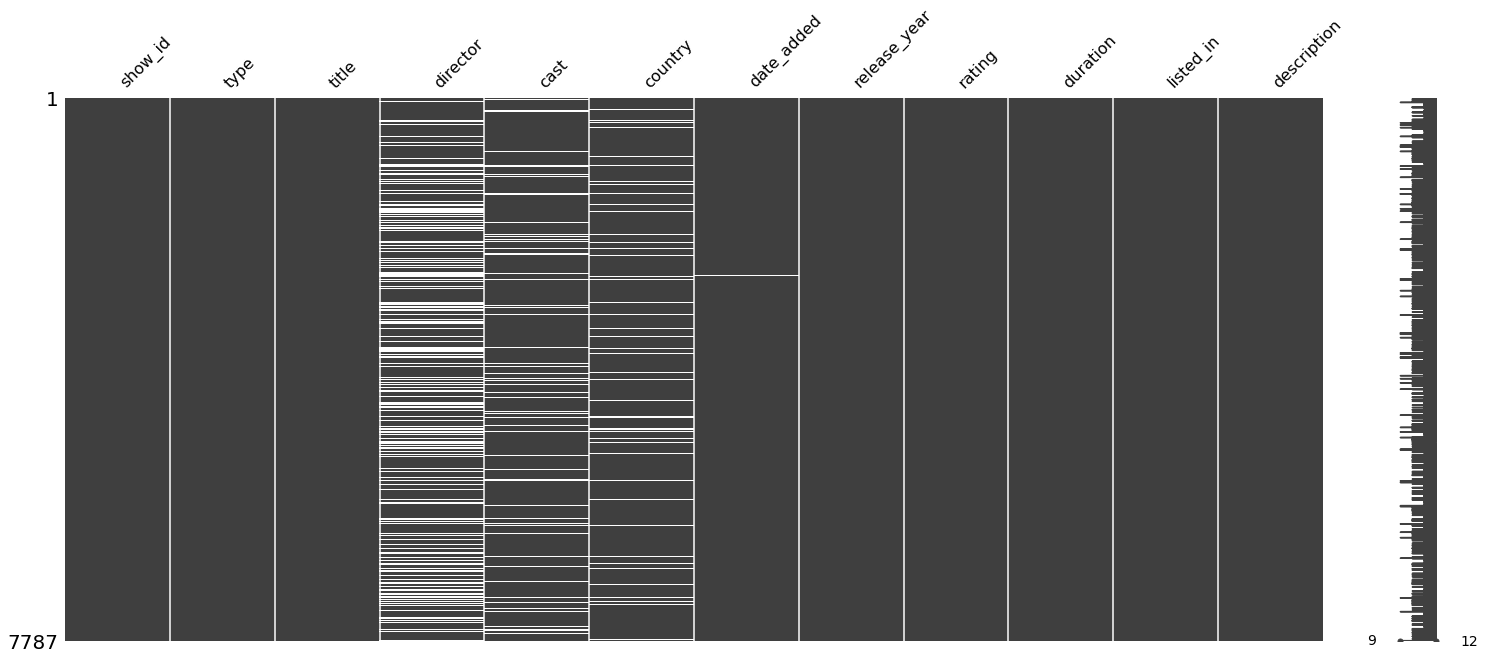

In [15]:
#this graph show the nan values in columns
msno.matrix(netflix_df)

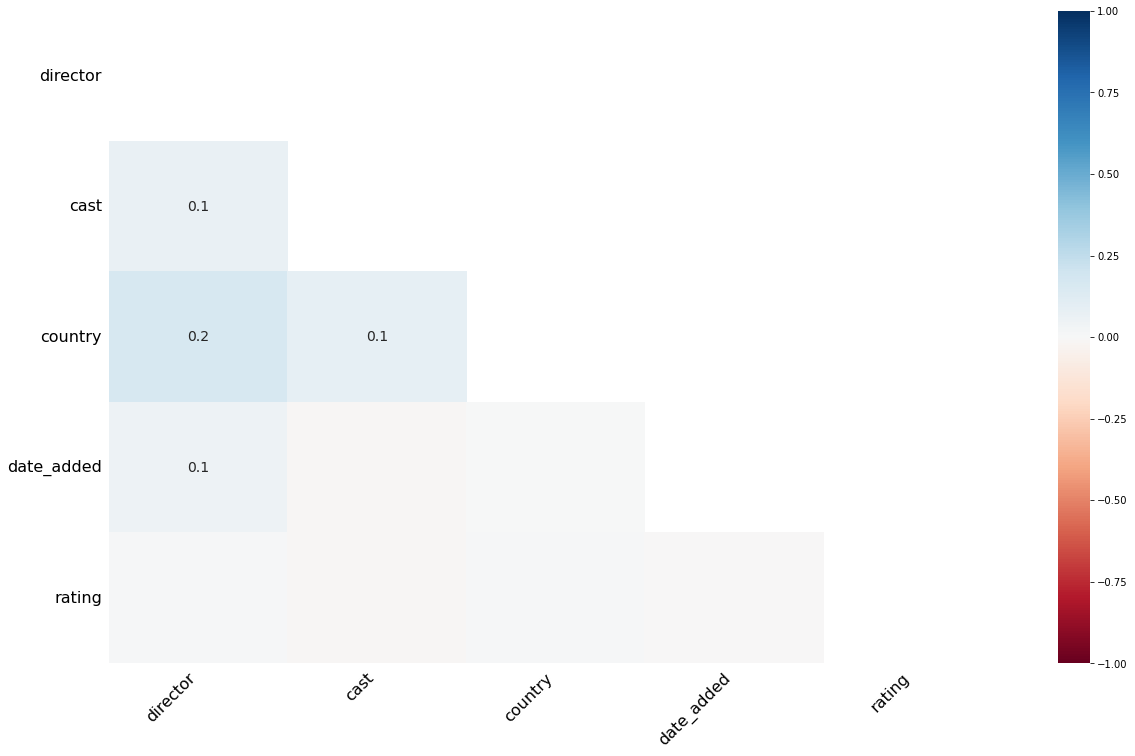

In [16]:
#This heatmap show the correlation between nan values columns
msno.heatmap(netflix_df)

In [17]:
#finding the duplicates in netflix_df
netflix_df.duplicated().sum()

0

As we can see above there is no duplicates in the dataset.


##Null values Treatment

In [18]:
#To seen nan values in date_added columns
netflix_df[netflix_df['date_added'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
258,s259,TV Show,A Young Doctor's Notebook and Other Stories,NaN,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaN,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
549,s550,TV Show,Anthony Bourdain: Parts Unknown,NaN,Anthony Bourdain,United States,NaN,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
2263,s2264,TV Show,Frasier,NaN,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaN,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
2288,s2289,TV Show,Friends,NaN,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaN,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
2555,s2556,TV Show,Gunslinger Girl,NaN,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaN,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."
3374,s3375,TV Show,Kikoriki,NaN,Igor Dmitriev,NaN,NaN,2010,TV-Y,2 Seasons,Kids' TV,A wacky rabbit and his gang of animal pals hav...
3492,s3493,TV Show,La Familia P. Luche,NaN,"Eugenio Derbez, Consuelo Duval, Luis Manuel Áv...",United States,NaN,2012,TV-14,3 Seasons,"International TV Shows, Spanish-Language TV Sh...","This irreverent sitcom featues Ludovico, Feder..."
3946,s3947,TV Show,Maron,NaN,"Marc Maron, Judd Hirsch, Josh Brener, Nora Zeh...",United States,NaN,2016,TV-MA,4 Seasons,TV Comedies,"Marc Maron stars as Marc Maron, who interviews..."
5137,s5138,TV Show,Red vs. Blue,NaN,"Burnie Burns, Jason Saldaña, Gustavo Sorola, G...",United States,NaN,2015,NR,13 Seasons,"TV Action & Adventure, TV Comedies, TV Sci-Fi ...","This parody of first-person shooter games, mil..."
6065,s6066,TV Show,The Adventures of Figaro Pho,NaN,"Luke Jurevicius, Craig Behenna, Charlotte Haml...",Australia,NaN,2015,TV-Y7,2 Seasons,"Kids' TV, TV Comedies","Imagine your worst fears, then multiply them: ..."


In [19]:
#Remove nan values in date_added
netflix_df.dropna(subset=['date_added'],inplace=True)

In [20]:
#TO seen nan values in rating column
netflix_df[netflix_df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [21]:
#Remove nan vlaues in rating 
netflix_df.dropna(subset=['rating'],inplace=True)

* As we can see on date_added and rating columns has 10 & 7 missing values so we decided to drope this nan values 
* And director, cast and country columns has large number of missing values 2389,718 & 507. so we desided to replace this nan values with "Unavailable"

Handling Missing values

In [22]:
#Remove nan values in director,cast and counrty
netflix_df.fillna('Unavaliable',inplace=True)

In [23]:
#After treatment of nan values check nan values
netflix_df.isna().sum().sum()

0

In [24]:
#describing data
netflix_df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7770,7770,7770,7770,7770,7770,7770,7770.000000,7770,7770,7770,7770
unique,7770,2,7770,4048,6818,682,1563,NaN,14,216,491,7752
top,s1,Movie,3%,Unavaliable,Unavaliable,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5372,1,2376,718,2546,118,NaN,2861,1606,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.935393,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.764357,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [25]:
#Looking for number of unique values in our dataset
netflix_df.nunique()

show_id         7770
type               2
title           7770
director        4048
cast            6818
country          682
date_added      1563
release_year      73
rating            14
duration         216
listed_in        491
description     7752
dtype: int64

In [26]:
netflix_df['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

Text(0.5, 1.0, 'Type of the Show on Netflix')

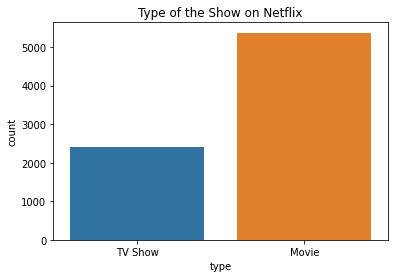

In [27]:
sns.countplot(x='type', data=netflix_df)
plt.title("Type of the Show on Netflix")

In [28]:
netflix_df['title'].value_counts()

3%                                         1
Return of the Prodigal Son                 1
RIDE ON TIME                               1
Ride Like a Girl                           1
Ricky Gervais: Humanity                    1
                                          ..
Handsome Devil                             1
Hamza's Suitcase                           1
Hamid                                      1
Hamburger Hill                             1
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS    1
Name: title, Length: 7770, dtype: int64

In [29]:
netflix_df['listed_in'].value_counts()

Documentaries                                                                      334
Stand-Up Comedy                                                                    321
Dramas, International Movies                                                       320
Comedies, Dramas, International Movies                                             243
Dramas, Independent Movies, International Movies                                   215
                                                                                  ... 
Anime Series, Crime TV Shows, TV Thrillers                                           1
Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows                         1
Crime TV Shows, International TV Shows, Reality TV                                   1
International Movies, Romantic Movies, Sci-Fi & Fantasy                              1
International TV Shows, Spanish-Language TV Shows, Stand-Up Comedy & Talk Shows      1
Name: listed_in, Length: 491, dtype: int64

In [30]:
netflix_df['listed_in'].unique()

array(['International TV Shows, TV Dramas, TV Sci-Fi & Fantasy',
       'Dramas, International Movies',
       'Horror Movies, International Movies',
       'Action & Adventure, Independent Movies, Sci-Fi & Fantasy',
       'Dramas', 'International TV Shows, TV Dramas, TV Mysteries',
       'Horror Movies, International Movies, Thrillers',
       'Dramas, Thrillers',
       'Crime TV Shows, International TV Shows, TV Dramas',
       'Crime TV Shows, Docuseries, International TV Shows',
       'Documentaries, International Movies, Sports Movies',
       'Independent Movies, Sci-Fi & Fantasy, Thrillers',
       'Dramas, International Movies, Thrillers',
       'International TV Shows, TV Dramas',
       'Comedies, Dramas, Independent Movies', 'Sports Movies',
       'Dramas, Independent Movies, International Movies',
       'Action & Adventure, Dramas, International Movies',
       'Anime Series, International TV Shows', 'Documentaries',
       'Reality TV', 'Documentaries, International

In [31]:
netflix_df['cast'].unique()

array(['João Miguel, Bianca Comparato, Michel Gomes, Rodolfo Valente, Vaneza Oliveira, Rafael Lozano, Viviane Porto, Mel Fronckowiak, Sergio Mamberti, Zezé Motta, Celso Frateschi',
       'Demián Bichir, Héctor Bonilla, Oscar Serrano, Azalia Ortiz, Octavio Michel, Carmen Beato',
       'Tedd Chan, Stella Chung, Henley Hii, Lawrence Koh, Tommy Kuan, Josh Lai, Mark Lee, Susan Leong, Benjamin Lim',
       ...,
       'Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanana, Manish Chaudhary, Meghna Malik, Malkeet Rauni, Anita Shabdish, Chittaranjan Tripathy',
       'Nasty C', 'Adriano Zumbo, Rachel Khoo'], dtype=object)

In [32]:
netflix_df['director'].value_counts().reset_index()

,index,director
0,Unavaliable,2376
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
...,...,...
4043,Charles Officer,1
4044,John Trengove,1
4045,Jonathan Helpert,1
4046,Jacob Schwab,1


 Make a copy of datasets

In [33]:
df = netflix_df.copy()

In [34]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [35]:
df.isna().sum().sum()

0

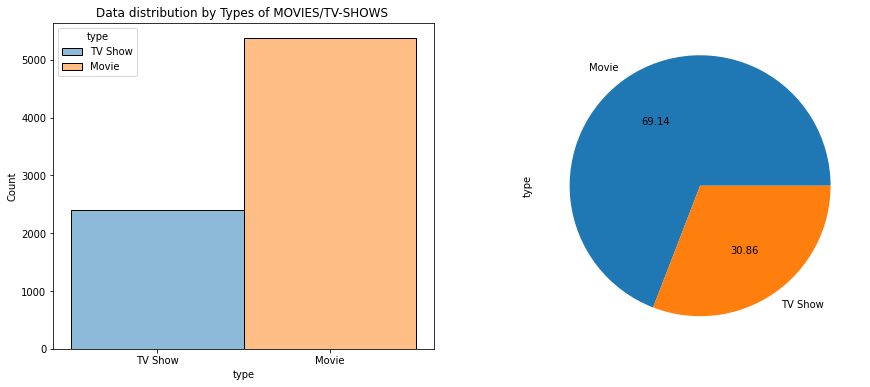

In [36]:
fig, axs = plt.subplots(1,2, figsize=(15,6))
#This graph represtent the distribution of Types of shows in Netflix
sns.histplot(x="type",ax=axs[0],hue='type', data=df).set(title='Data distribution by Types of MOVIES/TV-SHOWS ')
#This graph represtent the Percentage of types of shows in netflix
df['type'].value_counts().plot(kind='pie',autopct="%.2f")
plt.show()

In [37]:
netflix_df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [38]:
netflix_df.groupby(['type'])['rating'].value_counts()

type     rating  
Movie    TV-MA       1845
         TV-14       1272
         R            663
         TV-PG        505
         PG-13        386
         PG           247
         TV-Y         117
         TV-G         111
         TV-Y7         95
         NR            79
         G             39
         TV-Y7-FV       5
         UR             5
         NC-17          3
TV Show  TV-MA       1016
         TV-14        656
         TV-PG        299
         TV-Y7        175
         TV-Y         162
         TV-G          83
         NR             4
         R              2
         TV-Y7-FV       1
Name: rating, dtype: int64

In [39]:
#Rating of Tv shows and Movies
netflix_df.groupby(['rating'])['type'].value_counts()

rating    type   
G         Movie        39
NC-17     Movie         3
NR        Movie        79
          TV Show       4
PG        Movie       247
PG-13     Movie       386
R         Movie       663
          TV Show       2
TV-14     Movie      1272
          TV Show     656
TV-G      Movie       111
          TV Show      83
TV-MA     Movie      1845
          TV Show    1016
TV-PG     Movie       505
          TV Show     299
TV-Y      TV Show     162
          Movie       117
TV-Y7     TV Show     175
          Movie        95
TV-Y7-FV  Movie         5
          TV Show       1
UR        Movie         5
Name: type, dtype: int64

In [40]:
netflix_df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


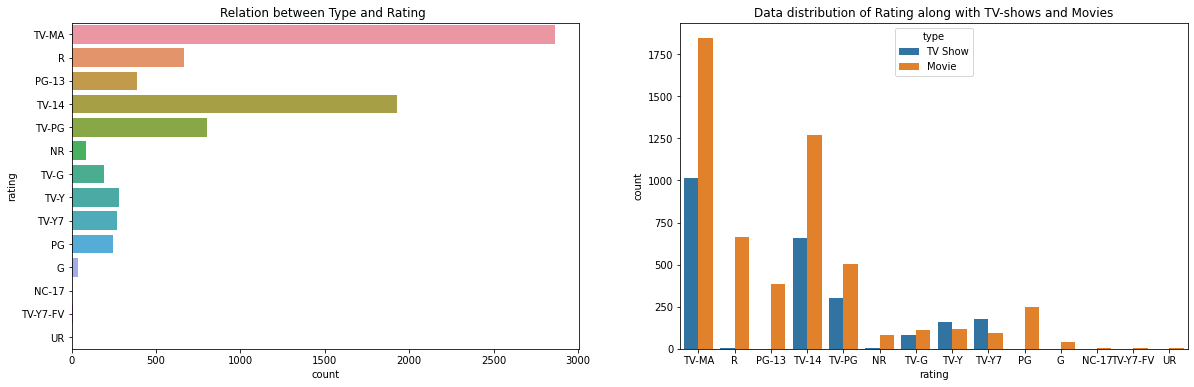

In [41]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent Relationship between Type and Rating  
sns.countplot(y="rating",ax=axs[0], data=df).set(title='Relation between Type and Rating ')
#This graph represents the distribution of Rating as well as the number of TV-show and Movies
sns.countplot(x="rating", hue="type",ax=axs[1], data=df).set(title='Data distribution of Rating along with TV-shows and Movies')

plt.show()

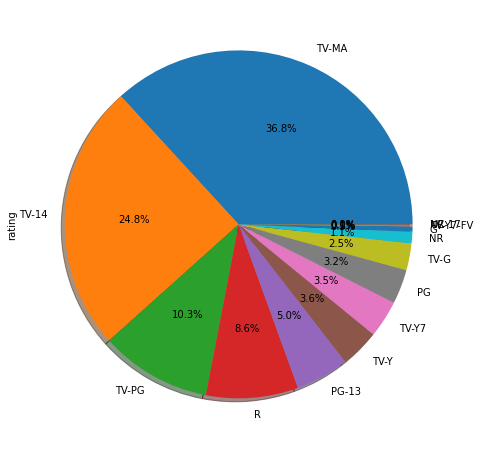

In [42]:
#To show the rating percentage 
df['rating'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(15,8))

plt.show()

##Ratings : Netflix rating is based on MPAA (Motion Picture Association of America) Ratings System and The TV Parental Guidelines ratings provides program ratings, and content ratings to provide a clearer idea of the reason for a program’s rating.

* **G** – General Audience(all ages admitted).
* **PG** – Parental Guidance Suggested ( some material may not be suitable for children).
*  **PG-13** – Parents Strongly Cautioned (some material may be inappropriated for children under 13).
* **R** – Restricted (Under 17 requires Accompanying parent or adult guardians).
* **NC-17** – No Children 17 or Under (no one 17 or under admitted),
* **TV-Y** – This program is designed to be appropriate for all children.
* **TV-Y7** – This program is designed for children age 7 and above.
* **TV-G** – General Audience
* **NR**  - NOt rated
* **TV-PG** – Parental Guidance Suggested or This program contains material that parents may find unsuitable for younger children.
* **TV-14** – Parents Strongly Cautioned or This program contains some material that many parents would find unsuitable for children under 14 years of age.
* **TV-MA** – TV Mature Audience Only or This program is specifically designed to be viewed by adults and therefore may be unsuitable for children under 17.
* **TV-Y7-FV** - Fantasy violence (exclusive to the TV-Y7 rating)
* **UR** -  unrated.





In [43]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...


In [45]:
df.isna().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

###Some Feature Engineering required For Data Visualization

In [46]:
# Creating a new features to store date, day, month and year seperately.
df['date'] = pd.to_datetime(df['date_added'],errors='coerce')
df['date_day'] = df['date'].dt.day.astype(int)
df['date_month'] = df['date'].dt.month.astype(int)
df['date_year'] = df['date'].dt.year.astype(int)

Converting date_added to datetime formate and create new features to store date,day ,month and year

In [47]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016


In [48]:
#Check unique value in release_year column
df['release_year'].unique()

array([2020, 2016, 2011, 2009, 2008, 2019, 1997, 2017, 2018, 2014, 2015,
       2010, 2005, 2013, 2012, 2006, 2000, 2003, 1989, 2004, 1977, 1971,
       1993, 2007, 1998, 1988, 1996, 2002, 1986, 1990, 1979, 1980, 1974,
       2001, 1999, 1966, 1991, 1982, 1994, 1995, 1978, 1992, 1972, 1975,
       2021, 1973, 1967, 1960, 1981, 1958, 1976, 1968, 1956, 1985, 1965,
       1984, 1983, 1987, 1945, 1946, 1962, 1925, 1942, 1969, 1955, 1963,
       1964, 1954, 1970, 1944, 1947, 1959, 1943])

In [49]:
#check total number of tv shows and movies year wise 
df['release_year'].value_counts().reset_index().head()

,index,release_year
0,2018,1120
1,2017,1010
2,2019,996
3,2016,881
4,2020,868


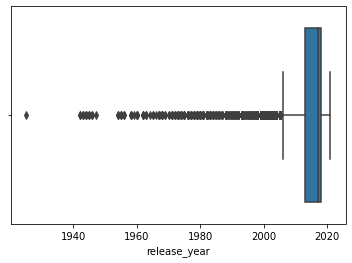

In [50]:
sns.boxplot(netflix_df.release_year)

As we can see from above boxplot, before 2014 the production growth for Movies & Tv Shows were very less ,that's why it's showing those values as outliers.

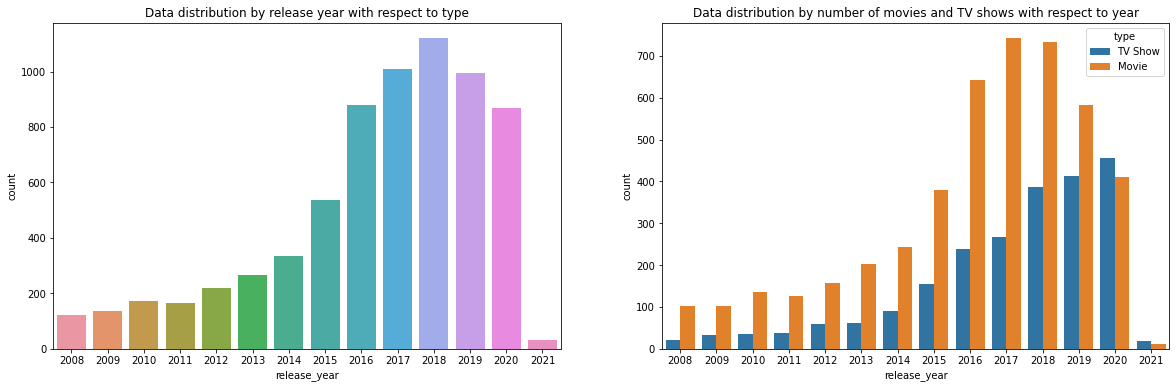

In [51]:

df1 = df[(df['release_year']>=2008)]
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number of movies anb tv shows released in after 2008
sns.countplot(x="release_year",ax=axs[0], data=df1).set(title='Data distribution by release year with respect to type')
# This graph represent the distribution of movies and tv shows released in after 2008  
sns.countplot(x="release_year",hue='type',ax=axs[1], data=df1).set(title='Data distribution by number of movies and TV shows with respect to year')
plt.show()
#ax = sns.countplot(x="release_year", hue="type", data=df1).set(title='Data distribution of release_year wise type of tv show and movies')

In [52]:
#check the unique values
df['country'].unique()

array(['Brazil', 'Mexico', 'Singapore', 'United States', 'Turkey',
       'Egypt', 'India', 'Poland, United States', 'Thailand', 'Nigeria',
       'Unavaliable', 'Norway, Iceland, United States', 'United Kingdom',
       'Japan', 'South Korea', 'Italy', 'Canada', 'Indonesia', 'Romania',
       'Spain', 'Iceland', 'South Africa, Nigeria', 'France',
       'United States, South Africa', 'Portugal, Spain',
       'Hong Kong, China, Singapore', 'United States, Germany',
       'South Africa, China, United States', 'Argentina',
       'United States, France, Serbia', 'Germany',
       'Denmark, France, Poland', 'Poland', 'Kenya',
       'New Zealand, United Kingdom', 'Pakistan', 'Australia',
       'Australia, United States', 'Mexico, United States',
       'United States, China', 'China, Hong Kong', 'Taiwan',
       'United States, United Kingdom', 'France, South Korea, Japan',
       'United States, Canada', 'United Kingdom, United States',
       'Netherlands, Denmark, South Africa', 'Ca

In [53]:
#check value counts of country
df['country'].value_counts().reset_index().head(10)

,index,country
0,United States,2546
1,India,923
2,Unavaliable,505
3,United Kingdom,396
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


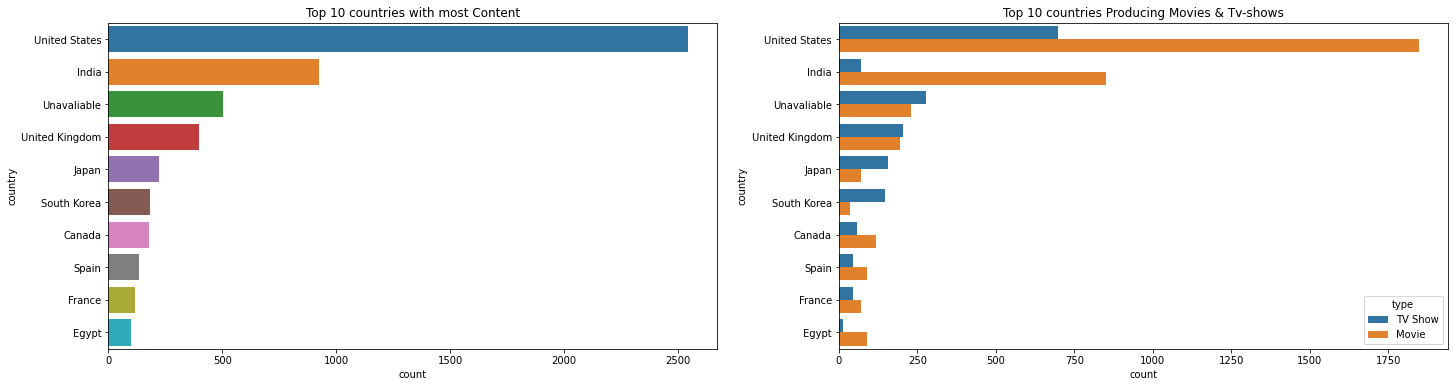

In [54]:
#Figuring some graph
fig,axs=plt.subplots(1,2,figsize=(24,6))
#Analysing top 10 countries with most content 
sns.countplot(data=df,y='country',ax=axs[0],order=df['country'].value_counts().index[0:10]).set(title='Top 10 countries with most Content')
#This graph represent the Top 10 countries contents with Movies and tv-shows
sns.countplot(data=df,y='country',ax=axs[1],order=df['country'].value_counts().index[0:10],hue='type').set(title='Top 10 countries Producing Movies & Tv-shows')
plt.show()

In [55]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016


In [56]:
#top 10 director
df['director'].value_counts().reset_index().head()

,index,director
0,Unavaliable,2376
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13


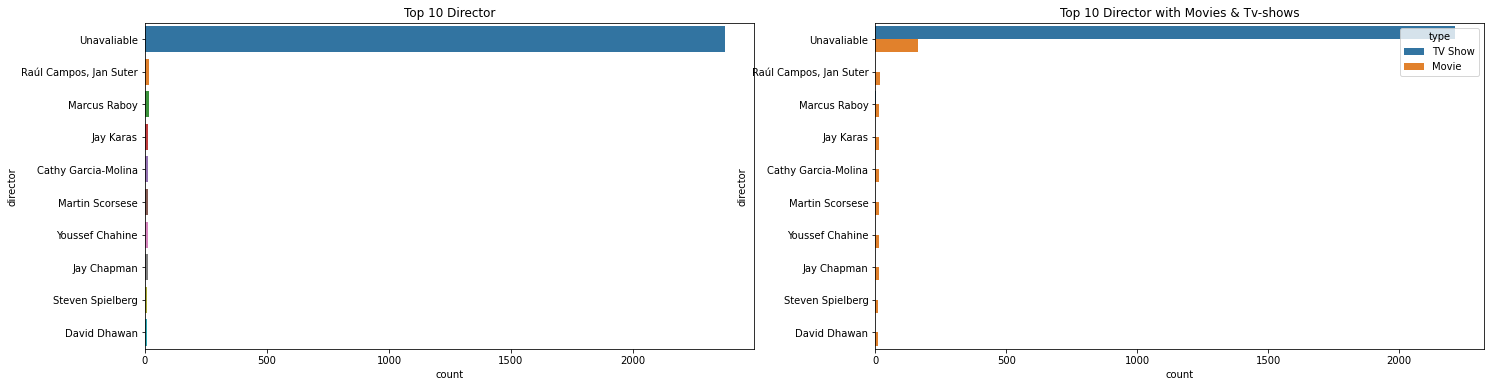

In [57]:
#Figuring some graph
fig,axs=plt.subplots(1,2,figsize=(24,6))
#Analysing top 10 Director
sns.countplot(data=df,y='director',ax=axs[0],order=df['director'].value_counts().index[0:10]).set(title='Top 10 Director')
#This graph represent the Top 10 director with Movies and tv-shows
sns.countplot(data=df,y='director',ax=axs[1],order=df['director'].value_counts().index[0:10],hue='type').set(title='Top 10 Director with Movies & Tv-shows')
plt.show()

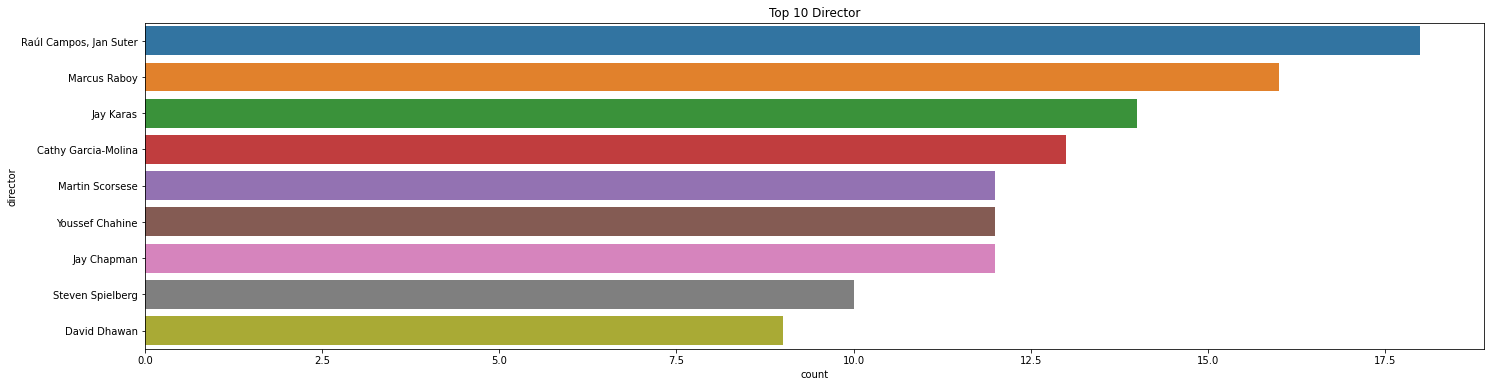

In [58]:
plt.figure(figsize=(24,6))
sns.countplot(y='director',data=df,order=df['director'].value_counts().index[1:10]).set(title='Top 10 Director')
plt.show()

In [59]:
#top actor 0 to 8
df['cast'].value_counts().reset_index().head()

,index,cast
0,Unavaliable,718
1,David Attenborough,18
2,Samuel West,10
3,Jeff Dunham,7
4,Craig Sechler,6


In [60]:
df['title'].value_counts().reset_index()

,index,title
0,3%,1
1,Return of the Prodigal Son,1
2,RIDE ON TIME,1
3,Ride Like a Girl,1
4,Ricky Gervais: Humanity,1
...,...,...
7765,Handsome Devil,1
7766,Hamza's Suitcase,1
7767,Hamid,1
7768,Hamburger Hill,1


In [61]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,date,date_day,date_month,date_year
0,s1,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,2020-08-14,14,8,2020
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,2016-12-23,23,12,2016


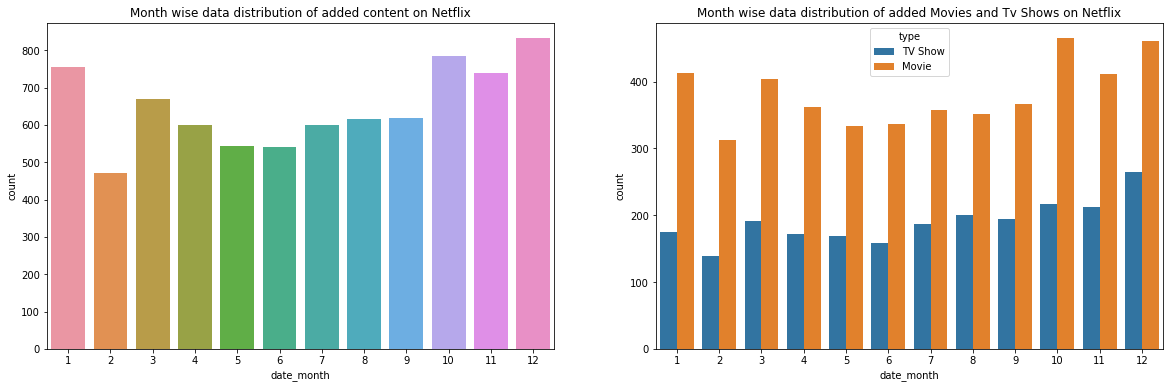

In [62]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(20,6))
# This graph represent the number Content added on netflix month wise
sns.countplot(x="date_month",ax=axs[0], data=df).set(title='Month wise data distribution of added content on Netflix')
# This graph represent the Monthly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_month",hue='type',ax=axs[1], data=df1).set(title='Month wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

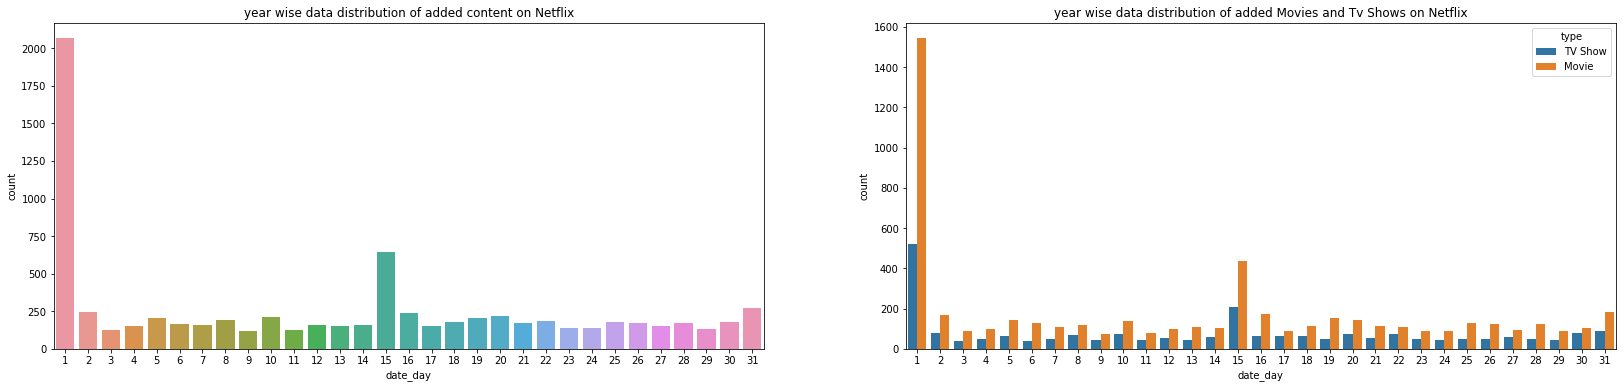

In [63]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(28,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(x="date_day",ax=axs[0], data=df).set(title='year wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_day",hue='type',ax=axs[1], data=df).set(title='year wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

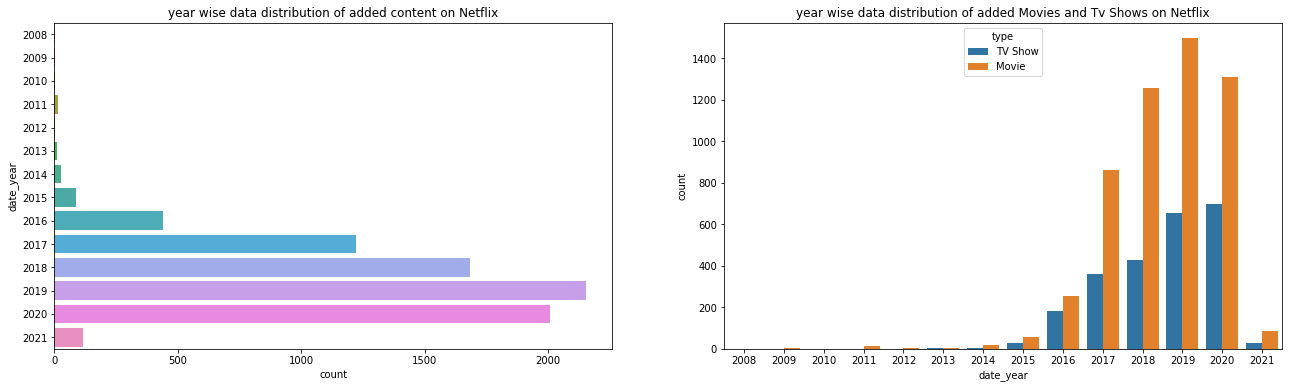

In [64]:
#figured some graphs
fig,axs = plt.subplots(1,2 ,figsize=(22,6))
# This graph represent the year wise number of Content added on netflix 
sns.countplot(y="date_year",ax=axs[0], data=df).set(title='year wise data distribution of added content on Netflix')
# This graph represent the yearly data distribution of added Movies and Tv shows on Netflix  
sns.countplot(x="date_year",hue='type',ax=axs[1], data=df).set(title='year wise data distribution of added Movies and Tv Shows on Netflix')
plt.show()

In [65]:
df_1 = df['country'].value_counts().reset_index()[:10].rename(columns={'index':'country','country':'count'})
df_1

,country,count
0,United States,2546
1,India,923
2,Unavaliable,505
3,United Kingdom,396
4,Japan,224
5,South Korea,183
6,Canada,177
7,Spain,134
8,France,115
9,Egypt,101


In [66]:
list_top_10_countries = df_1['country'].tolist()
list_top_10_countries

['United States',
 'India',
 'Unavaliable',
 'United Kingdom',
 'Japan',
 'South Korea',
 'Canada',
 'Spain',
 'France',
 'Egypt']

##**Country vs Rating**

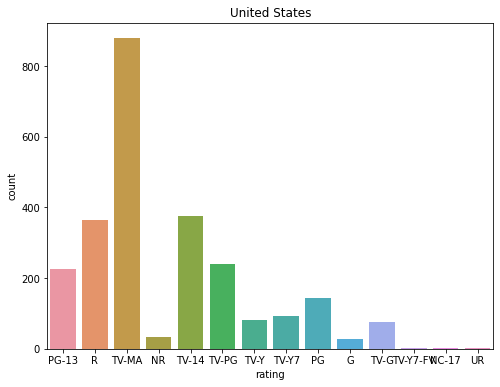

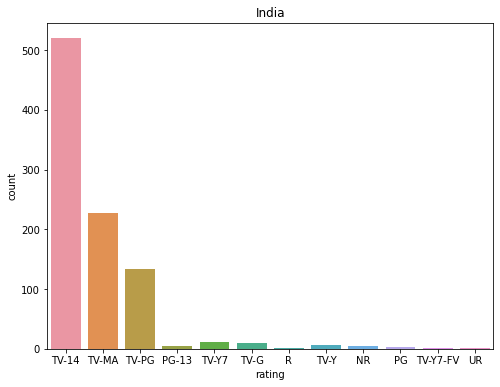

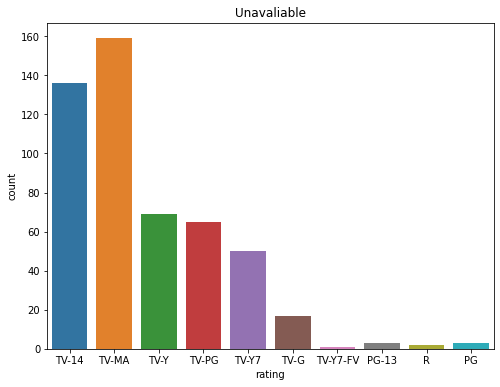

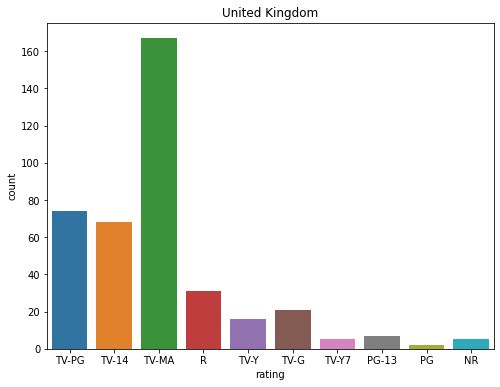

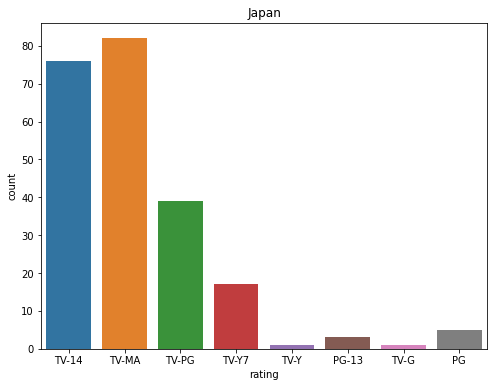

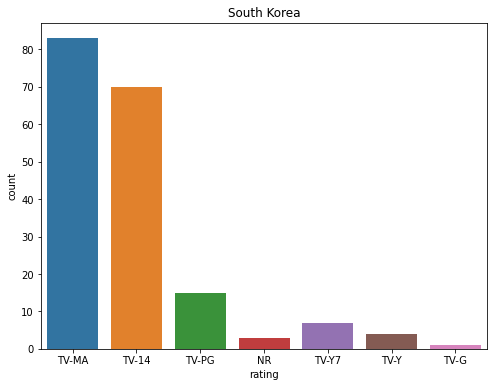

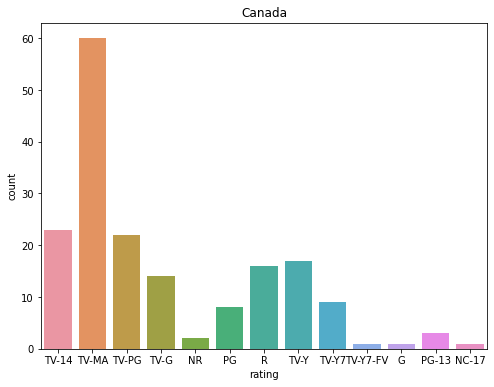

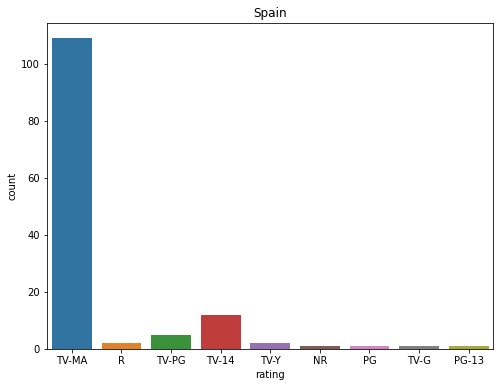

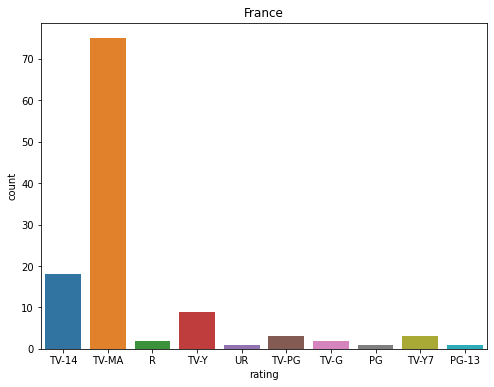

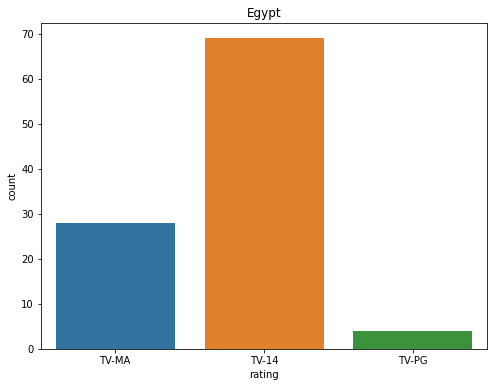

In [67]:

for country in list_top_10_countries:
  plt.figure(figsize=(8,6))
  ax = sns.countplot(x='rating',data=df[df['country']==country])
  ax.set_title(country)

#**WordCloud**

In [ ]:
from wordcloud import WordCloud, STOPWORDS

##**Word Cloud for Countries**

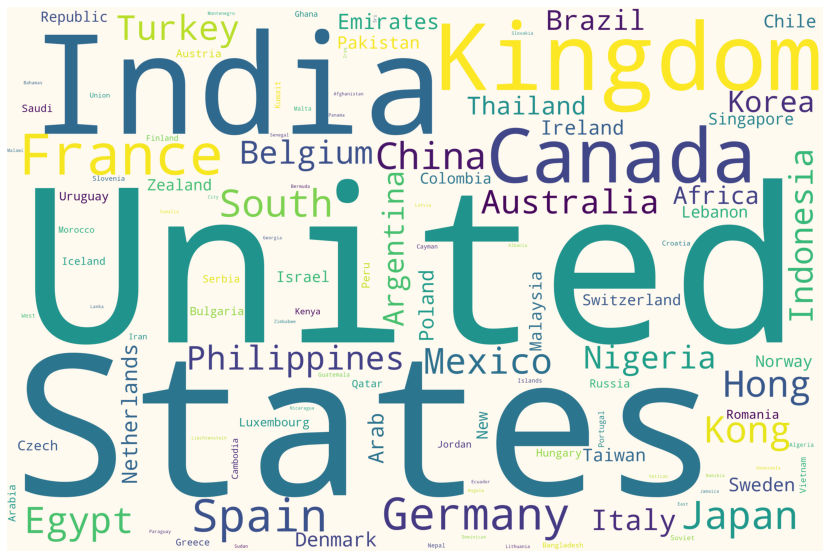

In [ ]:
#Creating the text variable
text = " ".join(country for country in df.country)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000,collocations = False, background_color = 'floralwhite').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for Title**

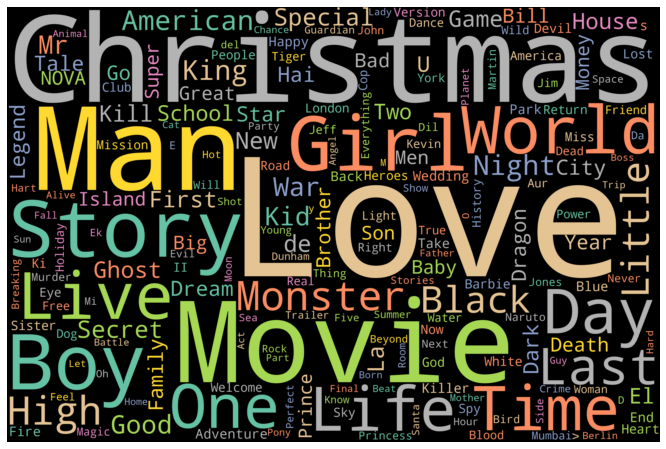

In [ ]:

plt.subplots(figsize=(20,8))
#Creating the text variable
text = " ".join(title for title in df.title)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000,random_state=1,collocations = False, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##**Word Cloud for cast**

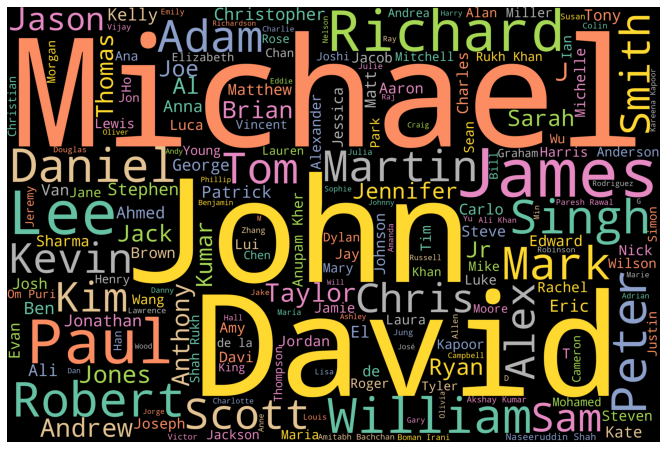

In [ ]:
#Creating the text variable
text = " ".join(cast for cast in df.cast)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,8))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'black',colormap='Set2').generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for Categories**

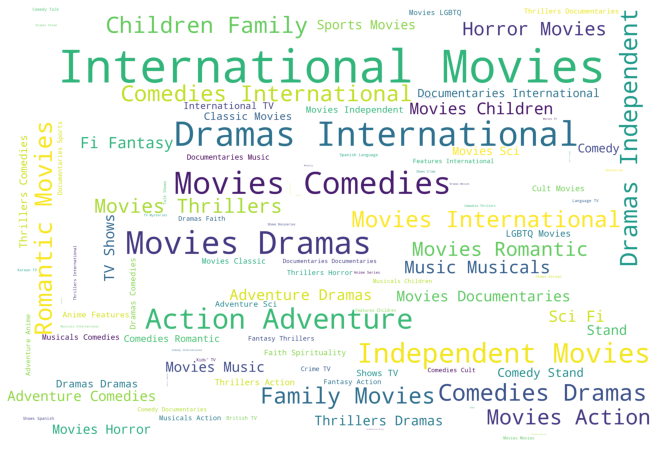

In [ ]:
plt.subplots(figsize=(20,8))
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white').generate(" ".join(i for i in df.listed_in))

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

##**Word Cloud for description**

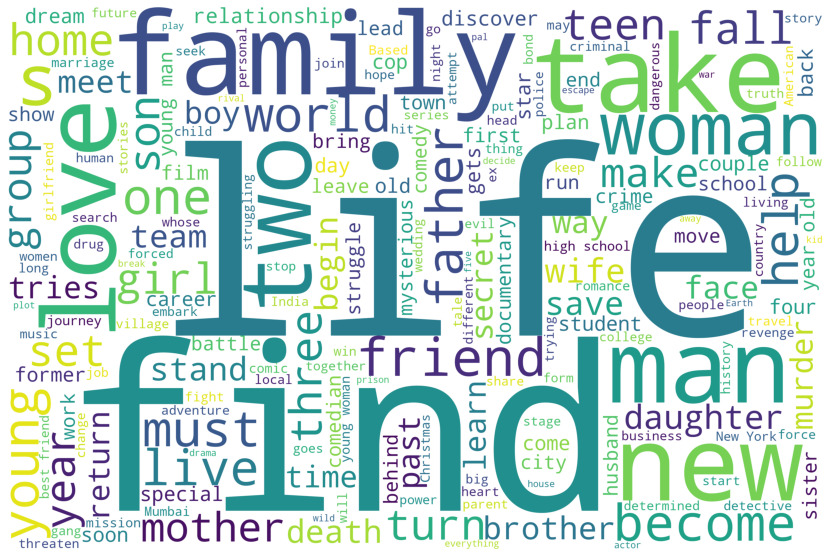

In [ ]:
#Creating the text variable
text = " ".join(df.description)
#Create StopWOrd
stopwords = set(STOPWORDS)

# Creating word_cloud with text as argument in .generate() method
plt.subplots(figsize=(20,10))
word_cloud = WordCloud(width=3000,height=2000, background_color = 'white',stopwords=STOPWORDS).generate(text)

# Display the generated Word Cloud
plt.imshow(word_cloud)
plt.axis("off")
plt.show()

 delete unnecessary column 
1.) show id, 2.)title 3.) date_added , 4.) duration 

In [68]:
#dropping unnecessary columns
netflix_df.drop(columns = ['show_id','date_added','duration'],inplace=True)

In [ ]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7770 entries, 0 to 7786
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   type          7770 non-null   object
 1   title         7770 non-null   object
 2   director      7770 non-null   object
 3   cast          7770 non-null   object
 4   country       7770 non-null   object
 5   release_year  7770 non-null   int64 
 6   rating        7770 non-null   object
 7   listed_in     7770 non-null   object
 8   description   7770 non-null   object
dtypes: int64(1), object(8)
memory usage: 607.0+ KB


In [ ]:
netflix_df.head()

,type,title,director,cast,country,release_year,rating,listed_in,description
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...


In [71]:
netflix_df['target']=netflix_df['description']+' '+netflix_df['rating']+' '+netflix_df['country']+' '+netflix_df['listed_in']

**Lowercasing and removing punctuation** 

Function to remove punctuation

In [72]:
# Remove punctuation
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

Apply a function 

In [73]:
netflix_df['target'] = netflix_df['target'].apply(remove_punctuation)
netflix_df.head(3)

,type,title,director,cast,country,release_year,rating,listed_in,description,target
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",When an army recruit is found dead his fellow ...


In [74]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [75]:
# extracting the stopwords from nltk library
Stop_Word = stopwords.words('english')
# displaying the stopwords
print(np.array(Stop_Word))
print("Number of stopwords: ", len(Stop_Word))

['i' 'me' 'my' 'myself' 'we' 'our' 'ours' 'ourselves' 'you' "you're"
 "you've" "you'll" "you'd" 'your' 'yours' 'yourself' 'yourselves' 'he'
 'him' 'his' 'himself' 'she' "she's" 'her' 'hers' 'herself' 'it' "it's"
 'its' 'itself' 'they' 'them' 'their' 'theirs' 'themselves' 'what' 'which'
 'who' 'whom' 'this' 'that' "that'll" 'these' 'those' 'am' 'is' 'are'
 'was' 'were' 'be' 'been' 'being' 'have' 'has' 'had' 'having' 'do' 'does'
 'did' 'doing' 'a' 'an' 'the' 'and' 'but' 'if' 'or' 'because' 'as' 'until'
 'while' 'of' 'at' 'by' 'for' 'with' 'about' 'against' 'between' 'into'
 'through' 'during' 'before' 'after' 'above' 'below' 'to' 'from' 'up'
 'down' 'in' 'out' 'on' 'off' 'over' 'under' 'again' 'further' 'then'
 'once' 'here' 'there' 'when' 'where' 'why' 'how' 'all' 'any' 'both'
 'each' 'few' 'more' 'most' 'other' 'some' 'such' 'no' 'nor' 'not' 'only'
 'own' 'same' 'so' 'than' 'too' 'very' 's' 't' 'can' 'will' 'just' 'don'
 "don't" 'should' "should've" 'now' 'd' 'll' 'm' 'o' 're' 've' 'y'

##Function to remove stopwords

In [76]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in Stop_Word]
    # joining the list of words with space separator
    return " ".join(text)

In [77]:
netflix_df['target'] = netflix_df['target'].apply(stopwords)
netflix_df.head(5)

,type,title,director,cast,country,release_year,rating,listed_in,description,target
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,future elite inhabit island paradise far crowd...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devastating earthquake hits mexico city trappe...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",army recruit found dead fellow soldiers forced...
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalyptic world ragdoll robots hide fear...
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,brilliant group students become cardcounting e...


In [78]:
netflix_df['target'].head().reset_index()

,index,target
0,0,future elite inhabit island paradise far crowd...
1,1,devastating earthquake hits mexico city trappe...
2,2,army recruit found dead fellow soldiers forced...
3,3,postapocalyptic world ragdoll robots hide fear...
4,4,brilliant group students become cardcounting e...


###Stemming operations

A funtion to carry out stemming operation

In [79]:
from nltk.stem.snowball import SnowballStemmer
# create an object of stemming function
stemmer = SnowballStemmer("english")

def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text)

In [80]:
#Applying steming functing on target columns
netflix_df['target'] = netflix_df['target'].apply(stemming)
netflix_df.head(10)

,type,title,director,cast,country,release_year,rating,listed_in,description,target
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...
5,TV Show,46,Serdar Akar,"Erdal Beşikçioğlu, Yasemin Allen, Melis Birkan...",Turkey,2016,TV-MA,"International TV Shows, TV Dramas, TV Mysteries",A genetics professor experiments with a treatm...,genet professor experi treatment comatos siste...
6,Movie,122,Yasir Al Yasiri,"Amina Khalil, Ahmed Dawood, Tarek Lotfy, Ahmed...",Egypt,2019,TV-MA,"Horror Movies, International Movies","After an awful accident, a couple admitted to ...",aw accid coupl admit grisli hospit separ must ...
7,Movie,187,Kevin Reynolds,"Samuel L. Jackson, John Heard, Kelly Rowan, Cl...",United States,1997,R,Dramas,After one of his high school students attacks ...,one high school student attack dedic teacher t...
8,Movie,706,Shravan Kumar,"Divya Dutta, Atul Kulkarni, Mohan Agashe, Anup...",India,2019,TV-14,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",doctor goe miss psychiatrist wife treat bizarr...
9,Movie,1920,Vikram Bhatt,"Rajneesh Duggal, Adah Sharma, Indraneil Sengup...",India,2008,TV-MA,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,architect wife move castl slate becom luxuri h...


In [81]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

documents = netflix_df['target'].values.astype("U")

vectorizer = TfidfVectorizer(stop_words='english')
features = vectorizer.fit_transform(documents)

k = 20
model = KMeans(n_clusters=k, init='k-means++', max_iter=100, n_init=1)
model.fit(features)


netflix_df['cluster'] = model.labels_

netflix_df

,type,title,director,cast,country,release_year,rating,listed_in,description,target,cluster
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,9
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...,2
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...,7
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...,8
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...,18
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,TV-MA,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,lebanon civil war depriv zozo famili hes left ...,2
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,TV-14,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,scrappi poor boy worm way tycoon dysfunct fami...,16
7784,Movie,Zulu Man in Japan,Unavaliable,Nasty C,Unavaliable,2019,TV-MA,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",documentari south african rapper nasti c hit s...,16
7785,TV Show,Zumbo's Just Desserts,Unavaliable,"Adriano Zumbo, Rachel Khoo",Australia,2019,TV-PG,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,dessert wizard adriano zumbo look next “willi ...,9


In [82]:
 documents

array(['futur elit inhabit island paradis far crowd slum get one chanc join 3 save squalor tvma brazil intern tv show tv drama tv scifi fantasi',
       'devast earthquak hit mexico citi trap survivor walk life wait rescu tri desper stay aliv tvma mexico drama intern movi',
       'armi recruit found dead fellow soldier forc confront terrifi secret that haunt jungl island train camp r singapor horror movi intern movi',
       ...,
       'documentari south african rapper nasti c hit stage street tokyo introduc citi sight sound cultur tvma unavali documentari intern movi music music',
       'dessert wizard adriano zumbo look next “willi wonka” tens competit find skill amateur compet 100000 prize tvpg australia intern tv show realiti tv',
       'documentari delv mystiqu behind bluesrock trio explor enigmat band creat icon look sound tvma unit kingdom canada unit state documentari music music'],
      dtype='<U224')

In [83]:
print(features)

  (0, 4548)	0.16871946526305326
  (0, 11028)	0.1701670341890784
  (0, 3835)	0.08021856596790591
  (0, 13014)	0.2628376092107725
  (0, 6510)	0.0700150491548806
  (0, 1842)	0.21582181205521217
  (0, 13018)	0.0798259397843338
  (0, 11908)	0.37000148207076977
  (0, 10963)	0.1830188384779924
  (0, 6785)	0.19838779878215015
  (0, 2346)	0.2202636489622416
  (0, 11601)	0.2922908400117567
  (0, 3119)	0.2780468941063934
  (0, 4552)	0.26185449493579993
  (0, 9280)	0.2952503693099378
  (0, 6604)	0.23036715841113675
  (0, 6435)	0.28009531080338923
  (0, 4082)	0.23351330192804598
  (0, 5084)	0.2154036368191793
  (1, 8427)	0.0669681395740999
  (1, 632)	0.28013367930481925
  (1, 11990)	0.2431180246887255
  (1, 3490)	0.23354528945198294
  (1, 12906)	0.17059447092921753
  (1, 10480)	0.21936492287388015
  :	:
  (7768, 9901)	0.21762554305061885
  (7768, 2784)	0.18628798561946294
  (7768, 10259)	0.1456374960916196
  (7768, 7519)	0.1697860174435897
  (7768, 13020)	0.11105295228070602
  (7768, 13014)	0.14913

In [84]:
clusters = netflix_df.groupby('cluster')

In [85]:
clusters.head()

,type,title,director,cast,country,release_year,rating,listed_in,description,target,cluster
0,TV Show,3%,Unavaliable,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,futur elit inhabit island paradis far crowd sl...,9
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,devast earthquak hit mexico citi trap survivor...,2
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",armi recruit found dead fellow soldier forc co...,7
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",postapocalypt world ragdol robot hide fear dan...,8
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,Dramas,A brilliant group of students become card-coun...,brilliant group student becom cardcount expert...,18
...,...,...,...,...,...,...,...,...,...,...,...
305,Movie,Adam Devine: Best Time of Our Lives,Jay Karas,Adam Devine,United States,2019,TV-MA,Stand-Up Comedy,Frenetic comic Adam Devine talks teen awkwardn...,frenet comic adam devin talk teen awkward cele...,14
307,Movie,ADAM SANDLER 100% FRESH,Steve Brill,Adam Sandler,United States,2018,TV-MA,Stand-Up Comedy,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San...",hero ice cream ladi – adam sandler comedi spec...,14
310,Movie,Adel Karam: Live from Beirut,Unavaliable,Adel Karam,United States,2018,TV-MA,Stand-Up Comedy,"From Casino du Liban, Lebanese actor and comed...",casino du liban lebanes actor comedian adel ka...,14
371,Movie,Alarmoty in the Land of Fire,Unavaliable,Unavaliable,Egypt,2017,TV-MA,"Comedies, International Movies","While vacationing at a resort, an ornery and o...",vacat resort orneri outspoken man held captiv ...,0


In [87]:
from sklearn.neighbors import NearestNeighbors

In [ ]:
for cluster in clusters.groups:
    f = open('cluster'+str(cluster)+ '.csv', 'w') # create csv file
    data = clusters.get_group(cluster)[['title','description']] # get title and description columns
    f.write(data.to_csv(index_label='id')) # set index to id
    f.close()
print("Cluster centroids: \n")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()

for i in range(k):
    print("Cluster %d:" % i)
    for j in order_centroids[i, :10]: #print out 10 feature terms of each cluster
        print (' %s' % terms[j])
    print('------------')

Cluster centroids: 

Cluster 0:
 standup
 special
 comedian
 tvma
 comedi
 state
 unit
 comic
 stage
 topic
------------
Cluster 1:
 japan
 tv14
 tvma
 world
 young
 tvpg
 human
 mysteri
 tokyo
 friend
------------
Cluster 2:
 documentari
 unit
 state
 tvma
 explor
 follow
 tvpg
 tv14
 seri
 kingdom
------------
Cluster 3:
 philippin
 cross
 path
 tv14
 tvma
 love
 meet
 romant
 chanc
 stranger
------------
Cluster 4:
 south
 korea
 africa
 tvma
 tv14
 korean
 life
 love
 live
 new
------------
Cluster 5:
 hong
 kong
 china
 tv14
 master
 martial
 tvma
 art
 young
 man
------------
Cluster 6:
 kingdom
 unit
 tvma
 tvpg
 state
 franc
 life
 seri
 london
 famili
------------
Cluster 7:
 stori
 true
 base
 unit
 tvma
 state
 tell
 event
 seri
 inspir
------------
Cluster 8:
 tvy7
 mexico
 state
 unit
 evil
 ranger
 save
 unavali
 power
 adventur
------------
Cluster 9:
 unavali
 tv14
 tvi
 tvma
 tvpg
 friend
 life
 world
 seri
 famili
------------
Cluster 10:
 new
 unit
 york
 state
 tvma

In [ ]:
from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

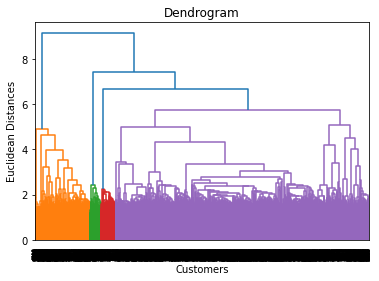

In [86]:
# Using the dendogram to find the optimal number of clusters
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(features.toarray(), method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Movies and TV Shows')
plt.ylabel('Euclidean Distances')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

In [88]:
# Fitting hierarchical clustering to the mall dataset
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(features.toarray())

In [90]:
y_hc

array([1, 0, 0, ..., 2, 1, 2])

In [ ]:
cluster_0=pd.read_csv('/content/cluster0.csv')

In [ ]:
cluster_0

,id,title,description
0,29,#blackAF,Kenya Barris and his family navigate relations...
1,220,A Russell Peters Christmas,"Inspired by the variety shows of the 1970s, ""A..."
2,305,Adam Devine: Best Time of Our Lives,Frenetic comic Adam Devine talks teen awkwardn...
3,306,Adam Ruins Everything,Education can be fun – and funny. Comedian Ada...
4,307,ADAM SANDLER 100% FRESH,"From ""Heroes"" to ""Ice Cream Ladies"" – Adam San..."
...,...,...,...
259,7604,Whitney Cummings: Money Shot,Comedy Central roast veteran Whitney Cummings ...
260,7656,Wonho Chung: Live in New York,At the Comic Strip's first Arabic stand-up sho...
261,7719,Yoo Byung Jae: Too Much Information,"""Saturday Night Live Korea"" writer-turned-come..."
262,7757,Zach Galifianakis: Live at the Purple Onion,"The unorthodox, piano-playing stand-up star Za..."


In [ ]:
cluster_9=pd.read_csv('/content/cluster9.csv')

In [ ]:
cluster_9

,id,title,description
0,34,#Roxy,A teenage hacker with a huge nose helps a cool...
1,87,21 Thunder,Players and coaches for a Montreal soccer team...
2,106,365 Days,A fiery executive in a spiritless relationship...
3,136,7 Khoon Maaf,"Spiced liberally with black comedy, this Bolly..."
4,201,A Love Story,Self-made millionaire Ian thinks he's found ha...
...,...,...,...
298,7663,Workin' Moms,Maternity leave is over and it's time for thes...
299,7664,World at Your Feet,A group of struggling individuals are united b...
300,7741,Your Name Engraved Herein,"In 1987, as martial law ends in Taiwan, Jia-ha..."
301,7743,Yours Fatefully,Two lonely singles meet on a blind date and sl...


**Implementing LDA**

In [91]:

from sklearn.decomposition import LatentDirichletAllocation


In [ ]:
documents = netflix_df['target'].values.astype("U")


In [92]:
# Parameters tuning using Grid Search
from sklearn.model_selection import GridSearchCV
grid_params = {}

# LDA model
lda = LatentDirichletAllocation(n_components=7)
lda.fit(features)

# Best LDA model
# best_lda_model = lda_model.best_estimator_

# print("Best LDA model's params" , lda_model.best_params_)
# print("Best log likelihood Score for the LDA model",lda_model.best_score_)
# print("LDA model Perplexity on train data", best_lda_model.perplexity(netflix_df['target'])

LatentDirichletAllocation(n_components=7)

In [93]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.7 MB 27.3 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=f6b851b2f8615cc7ef24ad8b9af266640792ae6a9a375004753a36e9ba2d91aa
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1310 sha256=26a525997435b2c8cfb336020a084a41460a9ba71aa231d74f615fc92ffd5a48
  Stored in directory: /root/.cache/pip/wheels/46/ef/c3/157e41f5ee1372d1be90b09f74f82b10e391eaacca8f22d33e
Successfully built pyLDAvis sklearn


In [94]:
import pyLDAvis.sklearn

pyLDAvis.enable_notebook()

/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/past/builtins/misc.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Mapping


In [95]:
lda_panel = pyLDAvis.sklearn.prepare(lda,features,vectorizer,mds='tsne')
lda_panel

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
6     -29.594002  60.112713       1        1  22.470355
2     -45.996586  11.891685       2        1  20.649528
0      20.368856  70.019325       3        1  18.941350
4      53.928768  31.704309       4        1  12.441243
3     -12.437127 -26.423267       5        1  10.463421
1       3.965971  21.797720       6        1   7.579044
5      37.524284 -16.517805       7        1   7.455059, topic_info=           Term       Freq      Total Category  logprob  loglift
11948   standup  55.000000  55.000000  Default  30.0000  30.0000
8485      music  83.000000  83.000000  Default  29.0000  29.0000
427      action  80.000000  80.000000  Default  28.0000  28.0000
2466   children  57.000000  57.000000  Default  27.0000  27.0000
6990        kid  52.000000  52.000000  Default  26.0000  26.0000
...         ...        ...        ...      ...      ...      ...
10724    romant   3.186331  84.480840   Topic7  -6.6017  -0.6814
8669        new   2.933539  62.100817   Topic7  -6.6843  -0.4563
7372       life   2.872439  68.589787   Topic7  -6.7054  -0.5767
7015    kingdom   2.842003  68.907502   Topic7  -6.7160  -0.5920
11948   standup   2.694721  55.921346   Topic7  -6.7692  -0.4364

[583 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
148        5  0.772016    1984
206        4  0.513543     20s
367        1  0.281742  aboard
367        3  0.563484  aboard
375        4  0.499522  abrupt
...      ...       ...     ...
14039      4  0.103404   young
14039      5  0.088632   young
14039      6  0.029544   young
14039      7  0.044316   young
14070      5  0.599308    zack

[1147 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 1, 5, 4, 2, 6])

argsort gives
Index of lowest to highest **element**
helpful in finding most repeated words